(parallel)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Parallelization

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!conda install -y quantecon

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done
Solving environment: / 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::scikit-learn==0.23.1=py38h423224d_0
  - defaults/noarch::nltk==3.5=py_0
  - defaults/linux-64::anaconda==2020.07=py38_0


\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done



## Package Plan ##

  environment location: /usr/share/miniconda3/envs/qe-lectures

  added / updated specs:
    - quantecon


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          35 KB
    joblib-0.17.0              |             py_0         206 KB
    quantecon-0.4.8            |           py38_0         285 KB
    ------------------------------------------------------------
                                           Total:         532 KB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/linux-64::_anaconda_depends-2020.07-py38_0
  joblib             pkgs/main/noarch::joblib-0.17.0-py_0
  quantecon          pkgs/main/linux-64::quantecon-0.4.8-py38_0

The following packages will be UPDATED:

  ca-certificates                               2020

anaconda-custom      | 35 KB     | ##################################### | 100% 
joblib-0.17.0        | 206 KB    |                                       |   0% 

joblib-0.17.0        | 206 KB    | ##################################### | 100% 
_anaconda_depends-20 | 6 KB      |                                       |   0% 

_anaconda_depends-20 | 6 KB      | ##################################### | 100% 
quantecon-0.4.8      | 285 KB    |                                       |   0% 

quantecon-0.4.8      | 285 KB    | ##################################### | 100% 
Preparing transaction: / 

done
Verifying transaction: \ 

| 

done
Executing transaction: - 

\ 

| 

/ 

- 

done


## Overview

The growth of CPU clock speed (i.e., the speed at which a single chain of logic can
be run) has slowed dramatically in recent years.

This is unlikely to change in the near future, due to inherent physical
limitations on the construction of chips and circuit boards.

Chip designers and computer programmers have responded to the slowdown by
seeking a different path to fast execution: parallelization.

Hardware makers have increased the number of cores (physical CPUs) embedded in each machine.

For programmers, the challenge has been to exploit these multiple CPUs by running many processes in parallel (i.e., simultaneously).

This is particularly important in scientific programming, which requires handling

* large amounts of data and
* CPU intensive simulations and other calculations.

In this lecture we discuss parallelization for scientific computing, with a focus on

1. the best tools for parallelization in Python and
1. how these tools can be applied to quantitative economic problems.

Let's start with some imports:

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

%matplotlib inline

## Types of Parallelization

Large textbooks have been written on different approaches to parallelization but we will keep a tight focus on what's most useful to us.

We will briefly review the two main kinds of parallelization commonly used in
scientific computing and discuss their pros and cons.

### Multiprocessing

Multiprocessing means concurrent execution of multiple processes using more than one processor.

In this context, a **process** is a chain of instructions (i.e., a program).

Multiprocessing can be carried out on one machine with multiple CPUs or on a
collection of machines connected by a network.

In the latter case, the collection of machines is usually called a
**cluster**.

With multiprocessing, each process has its own memory space, although the
physical memory chip might be shared.

### Multithreading

Multithreading is similar to multiprocessing, except that, during execution, the threads all share the same memory space.

Native Python struggles to implement multithreading due to some [legacy design
features](https://wiki.python.org/moin/GlobalInterpreterLock).

But this is not a restriction for scientific libraries like NumPy and Numba.

Functions imported from these libraries and JIT-compiled code run in low level
execution environments where Python's legacy restrictions don't apply.

### Advantages and Disadvantages

Multithreading is more lightweight because most system and memory resources
are shared by the threads.

In addition, the fact that multiple threads all access a shared pool of memory
is extremely convenient for numerical programming.

On the other hand, multiprocessing is more flexible and can be distributed
across clusters.

For the great majority of what we do in these lectures, multithreading will
suffice.

## Implicit Multithreading in NumPy

Actually, you have already been using multithreading in your Python code,
although you might not have realized it.

(We are, as usual, assuming that you are running the latest version of
Anaconda Python.)

This is because NumPy cleverly implements multithreading in a lot of its
compiled code.

Let's look at some examples to see this in action.

### A Matrix Operation

The next piece of code computes the eigenvalues of a large number of randomly
generated matrices.

It takes a few seconds to run.

In [3]:
n = 20
m = 1000
for i in range(n):
    X = np.random.randn(m, m)
    λ = np.linalg.eigvals(X)

Now, let's look at the output of the htop system monitor on our machine while
this code is running:

```{figure} /_static/lecture_specific/parallelization/htop_parallel_npmat.png
:scale: 45
```

We can see that 4 of the 8 CPUs are running at full speed.

This is because NumPy's `eigvals` routine neatly splits up the tasks and
distributes them to different threads.

### A Multithreaded Ufunc

Over the last few years, NumPy has managed to push this kind of multithreading
out to more and more operations.

For example, let's return to a maximization problem {ref}`discussed previously <ufuncs>`:

In [4]:
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

grid = np.linspace(-3, 3, 5000)
x, y = np.meshgrid(grid, grid)

In [5]:
%timeit np.max(f(x, y))

1.05 s ± 45.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If you have a system monitor such as htop (Linux/Mac) or perfmon
(Windows), then try running this and then observing the load on your CPUs.

(You will probably need to bump up the grid size to see large effects.)

At least on our machine, the output shows that the operation is successfully
distributed across multiple threads.

This is one of the reasons why the vectorized code above is fast.

### A Comparison with Numba

To get some basis for comparison for the last example, let's try the same
thing with Numba.

In fact there is an easy way to do this, since Numba can also be used to
create custom {ref}`ufuncs <ufuncs>` with the [@vectorize](http://numba.pydata.org/numba-doc/dev/user/vectorize.html) decorator.

In [6]:
from numba import vectorize

@vectorize
def f_vec(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

np.max(f_vec(x, y))  # Run once to compile

0.9999992797121728

In [7]:
%timeit np.max(f_vec(x, y))

635 ms ± 9.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


At least on our machine, the difference in the speed between the
Numba version and the vectorized NumPy version shown above is not large.

But there's quite a bit going on here so let's try to break down what is
happening.

Both Numba and NumPy use efficient machine code that's specialized to these
floating point operations.

However, the code NumPy uses is, in some ways, less efficient.

The reason is that, in NumPy, the operation `np.cos(x**2 + y**2) / (1 +
x**2 + y**2)` generates several intermediate arrays.

For example, a new array is created when `x**2` is calculated.

The same is true when `y**2` is calculated, and then `x**2 + y**2` and so on.

Numba avoids creating all these intermediate arrays by compiling one
function that is specialized to the entire operation.

But if this is true, then why isn't the Numba code faster?

The reason is that NumPy makes up for its disadvantages with implicit
multithreading, as we've just discussed.

### Multithreading a Numba Ufunc

Can we get both of these advantages at once?

In other words, can we pair

* the efficiency of Numba's highly specialized JIT compiled function and
* the speed gains from parallelization obtained by NumPy's implicit
  multithreading?

It turns out that we can, by adding some type information plus `target='parallel'`.

In [8]:
@vectorize('float64(float64, float64)', target='parallel')
def f_vec(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

np.max(f_vec(x, y))  # Run once to compile

0.9999992797121728

In [9]:
%timeit np.max(f_vec(x, y))

336 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now our code runs significantly faster than the NumPy version.

## Multithreaded Loops in Numba

We just saw one approach to parallelization in Numba, using the `parallel`
flag in `@vectorize`.

This is neat but, it turns out, not well suited to many problems we consider.

Fortunately, Numba provides another approach to multithreading that will work
for us almost everywhere parallelization is possible.

To illustrate, let's look first at a simple, single-threaded (i.e., non-parallelized) piece of code.

The code simulates updating the wealth $w_t$ of a household via the rule

$$
w_{t+1} = R_{t+1} s w_t + y_{t+1}
$$

Here

* $R$ is the gross rate of return on assets
* $s$ is the savings rate of the household and
* $y$ is labor income.

We model both $R$ and $y$ as independent draws from a lognormal
distribution.

Here's the code:

In [10]:
from numpy.random import randn
from numba import njit

@njit
def h(w, r=0.1, s=0.3, v1=0.1, v2=1.0):
    """
    Updates household wealth.
    """

    # Draw shocks
    R = np.exp(v1 * randn()) * (1 + r)
    y = np.exp(v2 * randn())

    # Update wealth
    w = R * s * w + y
    return w

Let's have a look at how wealth evolves under this rule.

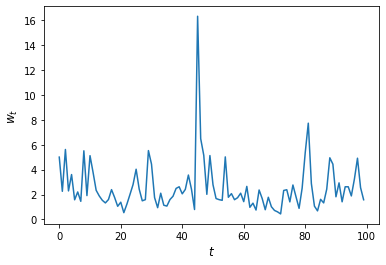

In [11]:
fig, ax = plt.subplots()

T = 100
w = np.empty(T)
w[0] = 5
for t in range(T-1):
    w[t+1] = h(w[t])

ax.plot(w)
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$w_{t}$', fontsize=12)
plt.show()

Now let's suppose that we have a large population of households and we want to
know what median wealth will be.

This is not easy to solve with pencil and paper, so we will use simulation
instead.

In particular, we will simulate a large number of households and then
calculate median wealth for this group.

Suppose we are interested in the long-run average of this median over time.

It turns out that, for the specification that we've chosen above, we can
calculate this by taking a one-period snapshot of what has happened to median
wealth of the group at the end of a long simulation.

Moreover, provided the simulation period is long enough, initial conditions
don't matter.

* This is due to something called ergodicity, which we will discuss [later on](https://python-intro.quantecon.org/finite_markov.html#Ergodicity).

So, in summary, we are going to simulate 50,000 households by

1. arbitrarily setting initial wealth to 1 and
1. simulating forward in time for 1,000 periods.

Then we'll calculate median wealth at the end period.

Here's the code:

In [12]:
@njit
def compute_long_run_median(w0=1, T=1000, num_reps=50_000):

    obs = np.empty(num_reps)
    for i in range(num_reps):
        w = w0
        for t in range(T):
            w = h(w)
        obs[i] = w

    return np.median(obs)

Let's see how fast this runs:

In [13]:
%%time
compute_long_run_median()

CPU times: user 6.93 s, sys: 21.4 ms, total: 6.95 s
Wall time: 6.94 s


1.8346851741416588

To speed this up, we're going to parallelize it via multithreading.

To do so, we add the `parallel=True` flag and change `range` to `prange`:

In [14]:
from numba import prange

@njit(parallel=True)
def compute_long_run_median_parallel(w0=1, T=1000, num_reps=50_000):

    obs = np.empty(num_reps)
    for i in prange(num_reps):
        w = w0
        for t in range(T):
            w = h(w)
        obs[i] = w

    return np.median(obs)

Let's look at the timing:

In [15]:
%%time
compute_long_run_median_parallel()

CPU times: user 6.05 s, sys: 3.86 ms, total: 6.05 s
Wall time: 3.23 s


1.841556412129254

The speed-up is significant.

### A Warning

Parallelization works well in the outer loop of the last example because the individual tasks inside the loop are independent of each other.

If this independence fails then parallelization is often problematic.

For example, each step inside the inner loop depends on the last step, so
independence fails, and this is why we use ordinary `range` instead of `prange`.

When you see us using `prange` in later lectures, it is because the
independence of tasks holds true.

When you see us using ordinary `range` in a jitted function, it is either because the speed gain from parallelization is small or because independence fails.

## Exercises

### Exercise 1

In {ref}`an earlier exercise <speed_ex1>`, we used Numba to accelerate an
effort to compute the constant $\pi$ by Monte Carlo.

Now try adding parallelization and see if you get further speed gains.

You should not expect huge gains here because, while there are many
independent tasks (draw point and test if in circle), each one has low
execution time.

Generally speaking, parallelization is less effective when the individual
tasks to be parallelized are very small relative to total execution time.

This is due to overheads associated with spreading all of these small tasks across multiple CPUs.

Nevertheless, with suitable hardware, it is possible to get nontrivial speed gains in this exercise.

For the size of the Monte Carlo simulation, use something substantial, such as
`n = 100_000_000`.

## Solutions

### Exercise 1

Here is one solution:

In [16]:
from random import uniform

@njit(parallel=True)
def calculate_pi(n=1_000_000):
    count = 0
    for i in prange(n):
        u, v = uniform(0, 1), uniform(0, 1)
        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
        if d < 0.5:
            count += 1

    area_estimate = count / n
    return area_estimate * 4  # dividing by radius**2

Now let's see how fast it runs:

In [17]:
%time calculate_pi()

CPU times: user 414 ms, sys: 411 µs, total: 414 ms
Wall time: 407 ms


3.14526

In [18]:
%time calculate_pi()

CPU times: user 12.8 ms, sys: 59 µs, total: 12.9 ms
Wall time: 10.6 ms


3.139084

By switching parallelization on and off (selecting `True` or
`False` in the `@njit` annotation), we can test the speed gain that
multithreading provides on top of JIT compilation.

On our workstation, we find that parallelization increases execution speed by
a factor of 2 or 3.

(If you are executing locally, you will get different numbers, depending mainly
on the number of CPUs on your machine.)